#Khoirunnisa 120450029

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Perovskite_Stability_with_features.csv')

In [ ]:
df.head(10)

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1
5,Ba2Gd6Fe8O24,Ba,Gd,NaN,Fe,NaN,NaN,O,4,70.973422,...,0,0,0,0,2,26,0,0,1,1
6,Ba2Ho6Fe8O24,Ba,Ho,NaN,Fe,NaN,NaN,O,4,291.384616,...,0,0,0,0,2,26,0,0,1,1
7,Ba2La6Co8O24,Ba,La,NaN,Co,NaN,NaN,O,4,59.634989,...,0,0,0,1,2,27,1,0,1,1
8,Ba2La6Cr8O24,Ba,La,NaN,Cr,NaN,NaN,O,4,16.668410,...,0,0,0,1,2,24,0,0,1,1
9,Ba2La6Fe8O24,Ba,La,NaN,Fe,NaN,NaN,O,4,0.000000,...,0,0,0,1,2,26,0,0,1,1


In [ ]:
df.tail(10)

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
1919,Y8V4Ni4O24,Y,NaN,NaN,V,Ni,NaN,O,4,23.809066,...,0,0,0,1,2,23,0,0,0,1
1920,Y8V6Co2O24,Y,NaN,NaN,V,Co,NaN,O,4,8.668872,...,0,0,0,1,2,23,0,0,0,1
1921,Y8V6Cr2O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1922,Y8V6Fe2O24,Y,NaN,NaN,V,Fe,NaN,O,4,28.895780,...,0,0,0,1,2,23,0,0,0,1
1923,Y8V6Ni2O24,Y,NaN,NaN,V,Ni,NaN,O,4,47.207903,...,0,0,0,1,2,23,0,0,0,1
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,0,0,0,1,2,23,0,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1928,Y8V8O24,Y,NaN,NaN,V,NaN,NaN,O,3,0.000000,...,0,0,0,1,2,23,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   num_of_atoms_host_Asite0                             1929 non-null   int64  
 1   host_Asite0_Heat of Vaporization                     1929 non-null   float64
 2   host_Bsite0_at. wt.                                  1929 non-null   float64
 3   host_Bsite0_Ionization Energy (kJ/mol)               1929 non-null   float64
 4   shannon_radii_AB_avg                                 1929 non-null   float64
 5   Density_AB_avg                                       1929 non-null   float64
 6   BCCefflatcnt_AB_avg                                  1929 non-null   float64
 7   BCCvolume_padiff_AB_avg                              1929 non-null   float64
 8   GSenergy_pa_AB_avg                                   1929 non-null  

In [ ]:
df.shape

(1929, 71)

In [ ]:
df.isnull().sum()

Material Composition          0
A site #1                     0
A site #2                   768
A site #3                  1895
B site #1                     0
                           ... 
host_Bsite0_At. #             0
host_Bsite0_IsHexagonal       0
host_Bsite0_IsNoblegas        0
Asite_IsAlkali_max            0
Bsite_IsMetal_max             0
Length: 81, dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of elements,1929.0,4.284085,0.535232,3.0000,4.000000,4.000000,5.000000,6.000000
energy_above_hull (meV/atom),1929.0,105.532633,98.395552,0.0000,33.436112,84.202506,155.909864,956.831956
formation_energy (eV/atom),1929.0,-1.914460,0.570340,-3.2085,-2.315473,-1.900529,-1.474341,-0.488125
num_of_atoms_host_Asite0,1929.0,6.100570,1.748812,3.0000,4.000000,6.000000,8.000000,8.000000
host_Asite0_Heat of Vaporization,1929.0,270.521830,116.946676,99.8700,140.200000,332.630000,393.300000,399.570000
...,...,...,...,...,...,...,...,...
host_Bsite0_At. #,1929.0,27.162779,8.238310,12.0000,24.000000,26.000000,28.000000,78.000000
host_Bsite0_IsHexagonal,1929.0,0.303784,0.460010,0.0000,0.000000,0.000000,1.000000,1.000000
host_Bsite0_IsNoblegas,1929.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
Asite_IsAlkali_max,1929.0,0.582167,0.493330,0.0000,0.000000,1.000000,1.000000,1.000000


In [ ]:
df.std(axis=0).sort_values().head(11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Bsite_IsMetal_max                0.000000
Asite_GSmagmom_min               0.000000
Asite_IsHalogen_weighted_avg     0.000000
host_Asite0_IsCubic              0.000000
Asite_IsBoron_weighted_avg       0.000000
host_Asite0_NsValence            0.000000
host_Bsite0_IsNoblegas           0.000000
host_Asite0_IsAlkali             0.000000
Bsite_IsMetal_weighted_avg       0.023298
Asite_IsPnictide_weighted_avg    0.029083
Asite_BCCenergydiff_min          0.058821
dtype: float64

Dari list std(standard deviasi) bahwa terdapat 9 feature dengan 0 std, maka selanjutnya tidak digunakan

In [ ]:
# those with 0 std dev
drop_columns = [
    'host_Asite0_NsValence',
    'host_Bsite0_IsNoblegas',
    'Asite_IsHalogen_weighted_avg',
    'Asite_IsBoron_weighted_avg',
    'host_Asite0_IsCubic',
    'Asite_GSmagmom_min',
    'host_Asite0_IsAlkali',
    'Bsite_IsMetal_max',
]

target_variable = 'energy_above_hull (meV/atom)'

categorial_variable_columns = [
    'num_of_atoms_host_Asite0',
    'host_Asite0_IsBCC',
    'host_Asite0_OrbitalD',
    'host_Bsite0_IsHexagonal',
    'Asite_IsAlkali_max',
]

In [ ]:
perov_df = df.drop(drop_columns, axis=1).copy()

In [ ]:
perov_df.shape

(1929, 73)

In [ ]:
perov_df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,Bsite_At. #_weighted_avg,Bsite_Period_weighted_avg,Bsite_IsMetal_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_At. #,host_Bsite0_IsHexagonal,Asite_IsAlkali_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,23.000,4.0,1.0,7.000,0.0,0,0,23,0,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,27.000,4.0,1.0,3.000,0.0,0,0,27,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,26.000,4.0,1.0,4.000,0.0,0,0,26,0,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,28.000,4.0,1.0,2.000,0.0,0,0,28,0,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,26.000,4.0,1.0,4.000,0.0,0,0,26,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,23.500,4.0,1.0,6.500,0.0,0,1,23,0,0
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,23.125,4.0,1.0,6.750,0.0,0,1,23,0,0
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,23.375,4.0,1.0,6.625,0.0,0,1,23,0,0
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,23.625,4.0,1.0,6.375,0.0,0,1,23,0,0


#EDA

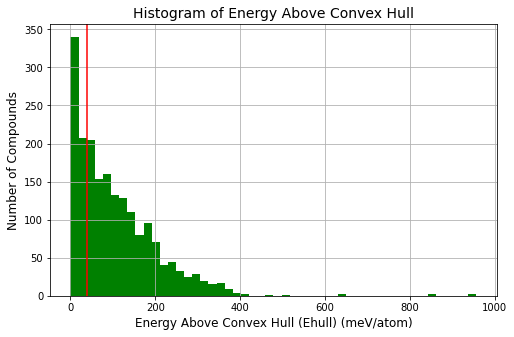

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

perov_df[target_variable].hist(bins=50, ax=ax, color='green')
ax.set_title('Histogram of Energy Above Convex Hull', fontsize=14)
ax.axvline(x=40, c='red')  # 40meV/atom batas standar stabil dan tidak stabil
plt.xlabel('Energy Above Convex Hull (Ehull) (meV/atom)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.show()

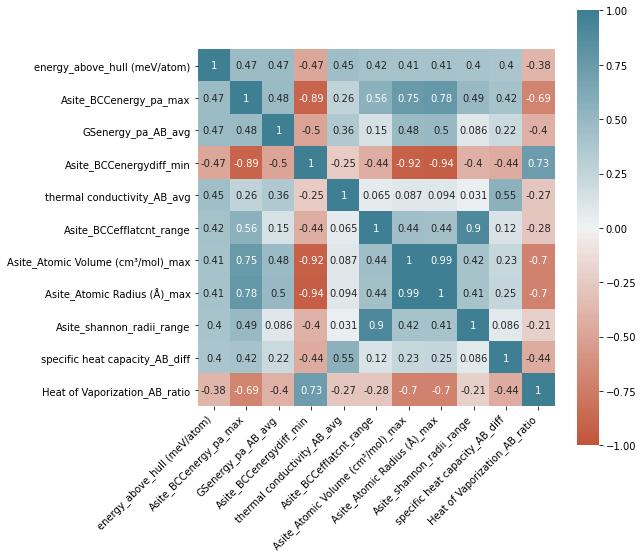

In [ ]:
# Heat Map

corr_to_plot = perov_df[[target_variable] + list(top_corrs.index.values)].corr()

fig, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(
    corr_to_plot, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Membuat Class Target

In [ ]:
class_df = df
class_df['class'] = class_df['energy_above_hull (meV/atom)']
class_df['class'][class_df['energy_above_hull (meV/atom)'] > 40] = 1 #Tidak Stabil
class_df['class'][class_df['energy_above_hull (meV/atom)'] <= 40] = 0 #Stabil
class_df.drop(['energy_above_hull (meV/atom)'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
class_df

,num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,GSenergy_pa_AB_avg,ICSDVolume_AB_avg,covalent radius_AB_avg,Ionization Energy (kJ/mol)_AB_avg,Electron Affinity (kJ/mol)_AB_avg,Atomic Volume (cm³/mol)_AB_avg,MendeleevNumber_AB_avg,First Ionization Potential (V)_AB_avg,thermal conductivity_AB_avg,at. wt._AB_diff,specific heat capacity_AB_diff,electrical conductivity_AB_diff,BCCefflatcnt_AB_ratio,Ionization Energy (kJ/mol)_AB_ratio,Heat of Vaporization_AB_ratio,Asite_BCCvolume_pa_weighted_avg,Asite_BCCvolume_padiff_weighted_avg,Asite_At. Radius (angstroms)_weighted_avg,Asite_n_ws^third_weighted_avg,Bsite_ BP (K)_weighted_avg,Bsite_At. Radius (angstroms)_weighted_avg,Bsite_Second Ionization Potential (V)_weighted_avg,Bsite_electrical conductivity_weighted_avg,Asite_Ionic Radius (angstroms)_max,Asite_BCCenergy_pa_max,Asite_Atomic Radius (Å)_max,Asite_At. Radius (angstroms)_max,Asite_Atomic Volume (cm³/mol)_max,Bsite_ BP (K)_max,Bsite_At. Radius (angstroms)_max,Bsite_First Ionization Potential (V)_max,Bsite_Third Ionization Potential (V)_max,Asite_shannon_radii_min,Asite_BCCenergy_pa_min,Asite_BCCenergydiff_min,Asite_At. Radius (angstroms)_min,Bsite_MendeleevNumber_min,Bsite_n_ws^third_min,Asite_shannon_radii_range,Asite_BCCefflatcnt_range,Asite_IsPnictide_weighted_avg,Asite_IsRareEarth_weighted_avg,Asite_NfUnfilled_weighted_avg,Asite_NfValence_weighted_avg,Bsite_At. #_weighted_avg,Bsite_Period_weighted_avg,Bsite_IsMetal_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_At. #,host_Bsite0_IsHexagonal,Asite_IsAlkali_max,class
0,7,136.90,50.9415,650.0,1.020625,4.390625,7.730568,-0.577500,-5.326081,35.32500,1.569375,596.83750,-51.7500,21.586250,27.0625,6.187312,18.044375,21.446125,-0.100500,0.36250,1.608809,0.836423,0.307393,54.2450,-1.15500,2.48875,0.83625,3650.000,1.92000,14.65000,4.0000,1.42,-1.677940,2.22,2.76,39.24,3650,1.92,6.740,29.310,1.440,-1.923522,0.000000,2.45,46,1.64,0.170,0.597912,0.00,0.00,0.0,0.0,23.000,4.0,1.0,7.000,0.0,0,0,23,0,1,0.0
1,4,332.63,58.9332,758.0,0.912500,7.810000,7.066584,-0.228750,-5.470804,26.43750,1.422500,660.52500,54.7500,16.117500,45.1250,6.857625,56.408750,49.049125,-0.121500,-8.11250,1.566252,0.742810,0.659295,41.3200,-0.65250,2.43250,1.09250,3143.000,1.67000,17.06000,17.9000,1.42,-1.923522,2.22,2.76,39.24,3143,1.67,7.860,33.500,1.170,-4.648540,0.000000,1.63,58,1.75,0.440,2.235901,0.25,0.50,5.5,5.0,27.000,4.0,1.0,3.000,0.0,0,0,27,1,1,1.0
2,6,154.67,55.8470,759.3,1.020750,4.967000,7.179786,-0.356250,-5.113806,30.23750,1.485000,663.68750,-53.0000,18.167500,31.2500,6.878875,117.400000,4.272000,0.043625,6.48750,1.583657,0.748156,0.432196,43.5125,-0.71250,2.36250,0.88500,3023.000,1.72000,16.18000,11.2000,1.42,-1.923522,2.22,2.76,39.24,3023,1.72,7.870,30.651,1.340,-1.927259,0.000000,2.23,55,1.77,0.270,1.674764,0.00,0.00,0.0,0.0,26.000,4.0,1.0,4.000,0.0,0,0,26,0,1,1.0
3,4,332.63,58.6934,736.7,0.905000,7.672500,6.929113,0.078125,-4.308582,24.56250,1.411250,670.42500,61.5000,15.037500,44.6250,6.958125,62.875000,37.097725,-0.119250,-4.73750,1.525229,0.820076,0.599556,38.7550,0.14625,2.45250,1.11250,3005.000,1.62000,18.16800,14.6000,1.42,-0.740339,2.22,2.76,39.24,3005,1.62,7.635,35.170,1.200,-4.648540,0.000000,1.71,61,1.75,0.410,3.258029,0.00,0.50,5.5,1.5,28.000,4.0,1.0,2.000,0.0,0,0,28,0,1,1.0
4,6,230.00,55.8470,759.3,0.924375,7.592000,7.011255,-0.011250,-6.108765,25.55000,1.428750,657.01250,24.2500,15.580000,40.2500,6.814000,46.412500,50.180250,-0.134125,-4.83750,1.523011,0.730574,0.593848,39.3050,-0.02250,2.55750,1.11750,3023.000,1.72000,16.18000,11.2000,1.42,-1.923522,2.22,2.76,39.24,3023,1.72,7.870,30.651,1.083,-4.455381,0.000000,2.49,55,1.77,0.527,2.124181,0.00,0.75,3.0,7.5,26.000,4.0,1.0,4.000,0.0,0,0,26,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

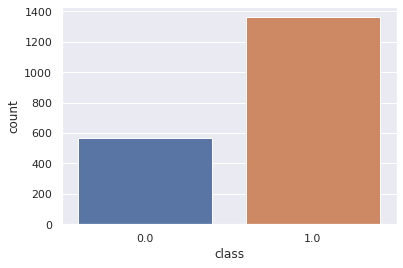

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")

ax = sns.countplot(x="class", data=class_df)

Grafik di atas menunjukkan bahwa terdapat senyawa yang kristal perovskite yang tidak stabil

#Data Processing

##Split Data

Menentukan Variabel Independen (Y) dan Variabel dependent (X)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
X = class_df.loc[:, class_df.columns !='class']
y = class_df.loc[:, 'class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1543, 80)
X_test : (386, 80)
y_train : (1543,)
y_test : (386,)


In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=65, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=52,
                    batch_size =16, verbose=0)

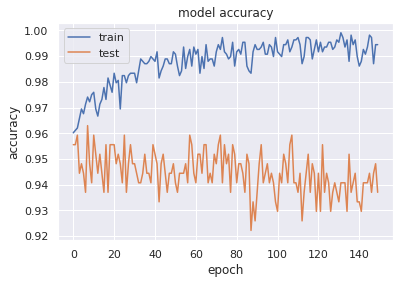

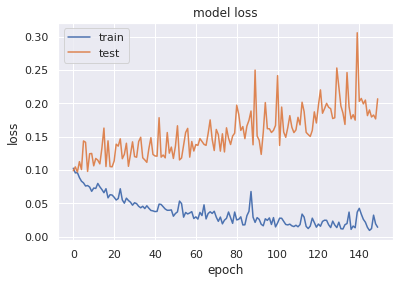

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Scale Data

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#ANN Model

In [ ]:
X_train.shape

(1543, 62)

Model dengan 62 input layer, 30 hidden layer dan 1 ouput layer

In [ ]:
model=Sequential()

model.add(Dense(62, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 62)                3906      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1890      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,827
Trainable params: 5,827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=150, callbacks=[history])

Epoch 1/150
49/49 [==============================] - 1s 13ms/step - loss: 0.5922 - accuracy: 0.6969 - val_loss: 0.4788 - val_accuracy: 0.7617
Epoch 2/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7700 - val_loss: 0.4374 - val_accuracy: 0.7642
Epoch 3/150
49/49 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7576 - val_loss: 0.4210 - val_accuracy: 0.7824
Epoch 4/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7863 - val_loss: 0.4074 - val_accuracy: 0.7979
Epoch 5/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7765 - val_loss: 0.4171 - val_accuracy: 0.7902
Epoch 6/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.7986 - val_loss: 0.3834 - val_accuracy: 0.8005
Epoch 7/150
49/49 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.7857 - val_loss: 0.4002 - val_accuracy: 0.7953
Epoch 8/150


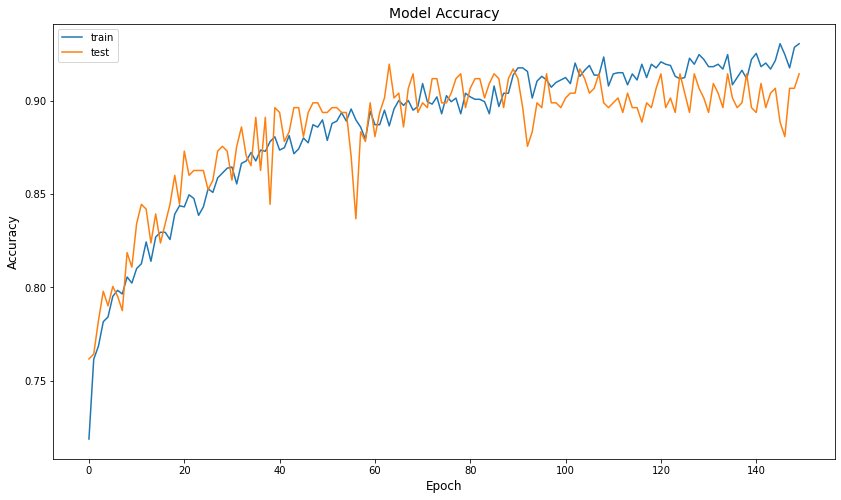

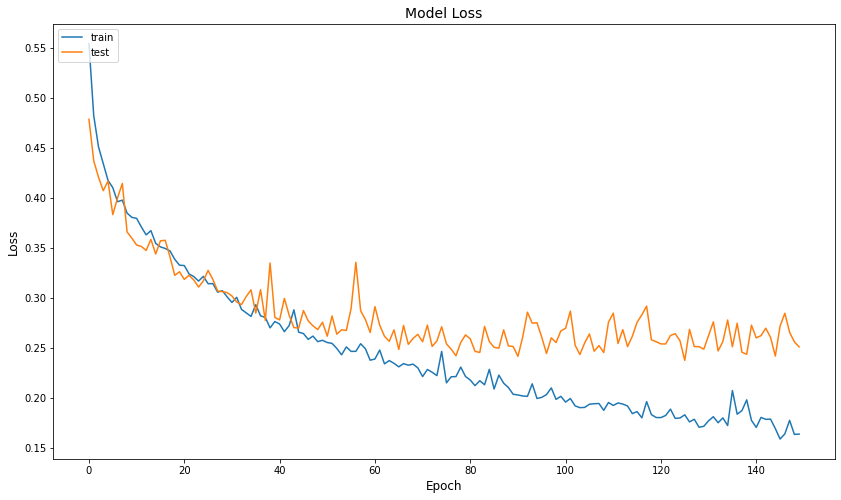

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

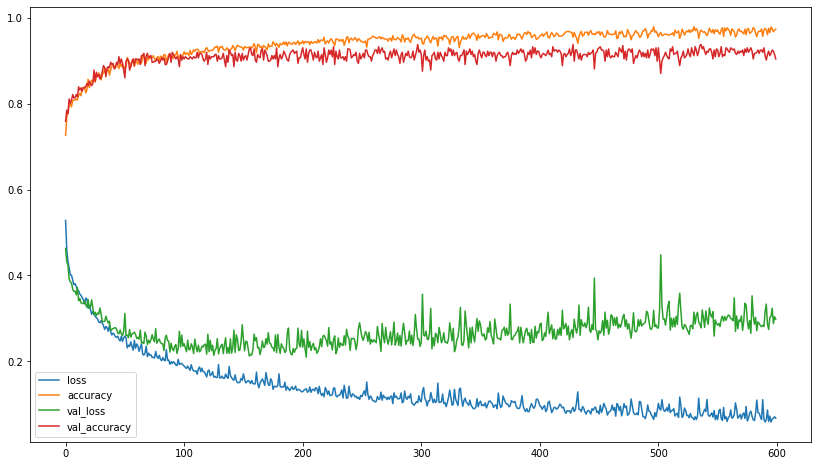

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

## Model diubah Layer

#Other Model : with early stopping

In [ ]:
model=Sequential()

model.add(Dense(62, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 62)                3906      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1890      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,827
Trainable params: 5,827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,callbacks=[early_stop])

Epoch 1/300
49/49 [==============================] - 1s 6ms/step - loss: 0.5735 - accuracy: 0.7029 - val_loss: 0.4786 - val_accuracy: 0.7565
Epoch 2/300
49/49 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7643 - val_loss: 0.4693 - val_accuracy: 0.7746
Epoch 3/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.7880 - val_loss: 0.4245 - val_accuracy: 0.7746
Epoch 4/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.7909 - val_loss: 0.4101 - val_accuracy: 0.7927
Epoch 5/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7806 - val_loss: 0.4176 - val_accuracy: 0.7902
Epoch 6/300
49/49 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8023 - val_loss: 0.3921 - val_accuracy: 0.7927
Epoch 7/300
49/49 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8071 - val_loss: 0.3816 - val_accuracy: 0.8161
Epoch 8/300
4

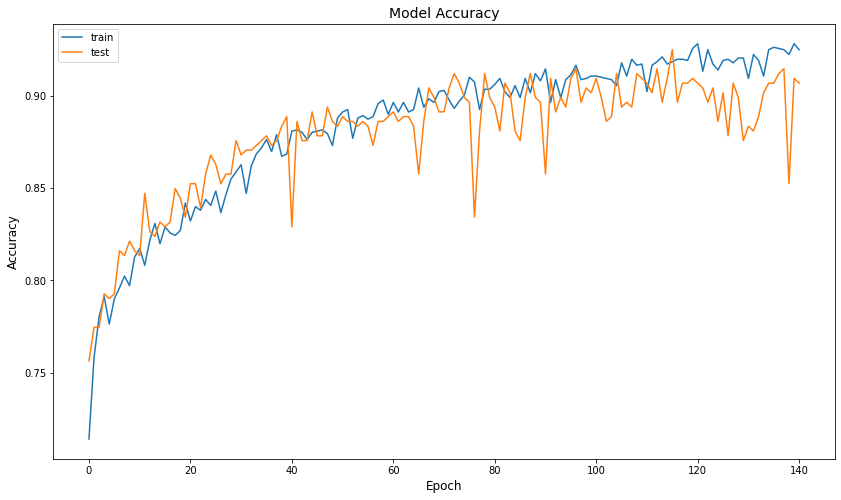

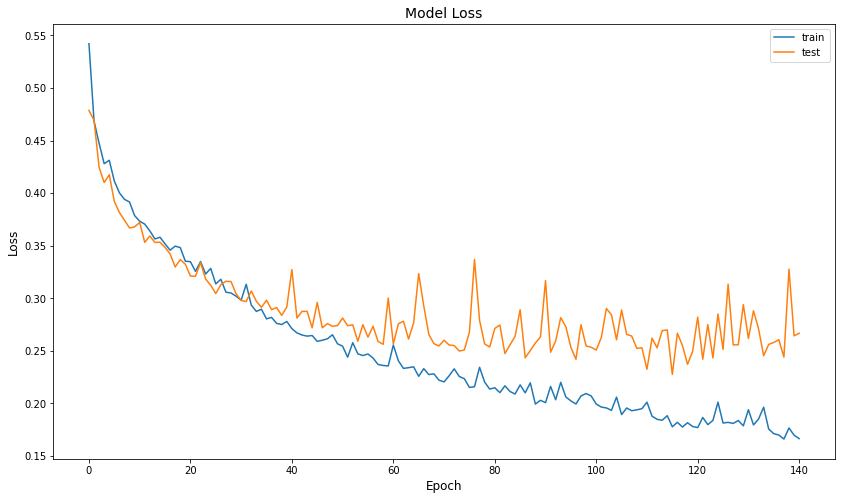

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

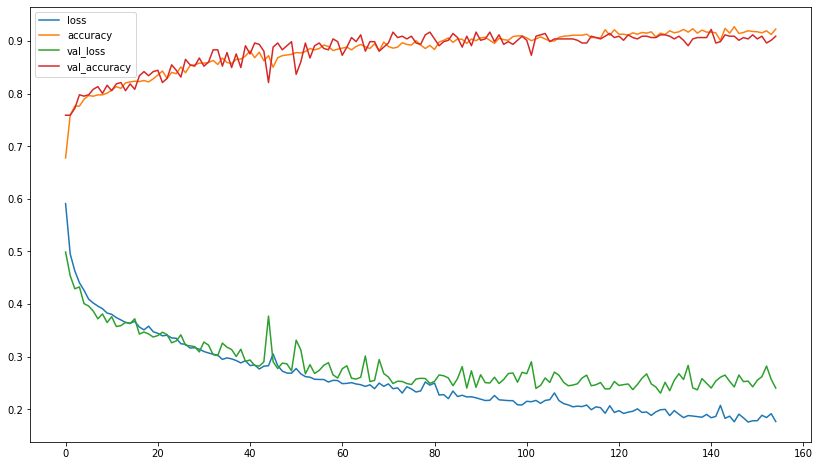

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

Model lain : Dropout Layer

In [ ]:
model=Sequential()

model.add(Dense(90, input_dim = X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 90)                5670      
_________________________________________________________________
dropout_18 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 40)                3640      
_________________________________________________________________
dropout_19 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 41        
Total params: 9,351
Trainable params: 9,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
49/49 [==============================] - 1s 6ms/step - loss: 0.7409 - accuracy: 0.5460 - val_loss: 0.5149 - val_accuracy: 0.7332
Epoch 2/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.7212 - val_loss: 0.4701 - val_accuracy: 0.7746
Epoch 3/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7184 - val_loss: 0.4425 - val_accuracy: 0.7824
Epoch 4/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7471 - val_loss: 0.4317 - val_accuracy: 0.7876
Epoch 5/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7539 - val_loss: 0.4126 - val_accuracy: 0.7902
Epoch 6/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7686 - val_loss: 0.4070 - val_accuracy: 0.7798
Epoch 7/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7752 - val_loss: 0.4056 - val_accuracy: 0.8005
Epoch 8/600
4

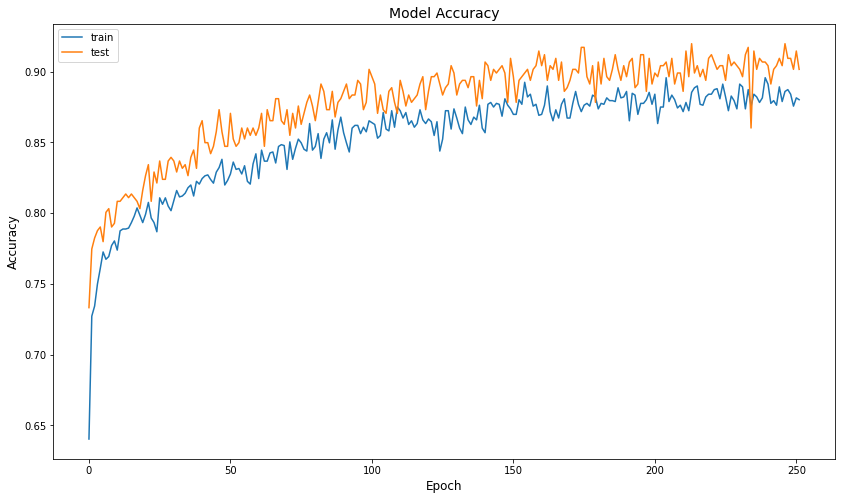

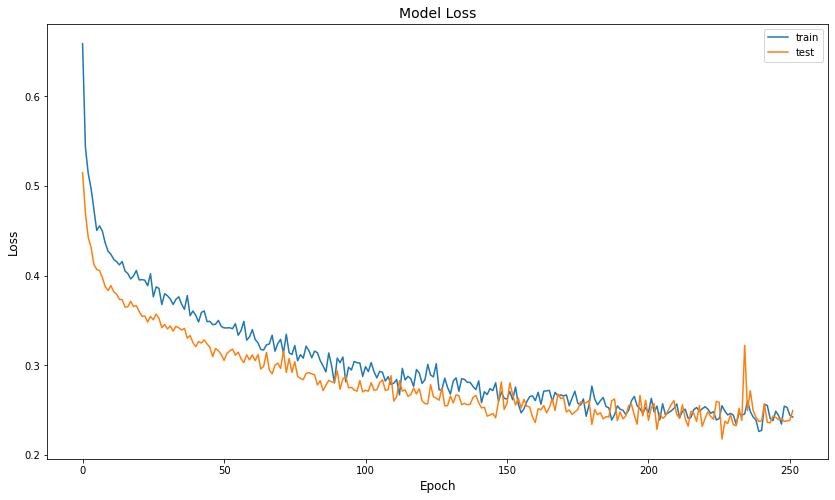

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

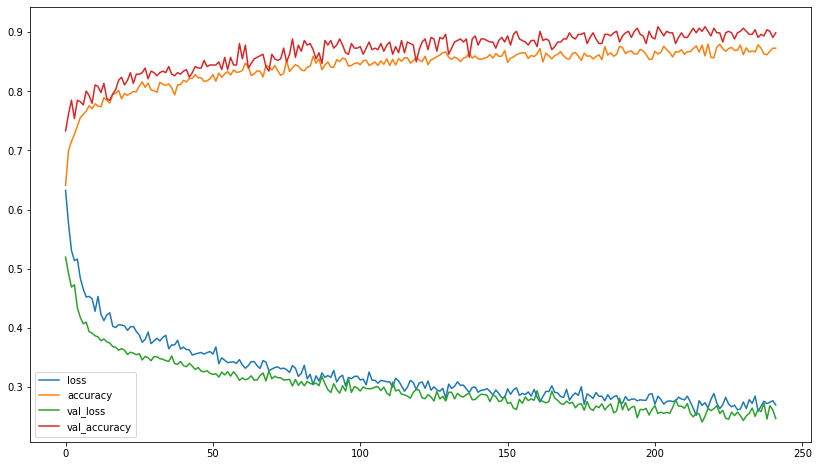

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

**Perfect....** 

#Evaluating Model

In [ ]:
preds = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
preds

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       103
         1.0       0.94      0.92      0.93       283

    accuracy                           0.90       386
   macro avg       0.87      0.88      0.88       386
weighted avg       0.90      0.90      0.90       386



In [ ]:
print(confusion_matrix(y_test,preds))

[[ 87  16]
 [ 22 261]]


In [ ]:
accuracy_score(y_test,preds)

0.9015544041450777

F1 Score ini sudah Jauh lebih baik di banding paper hanya 0,87

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Material Science/test_data2.csv')

In [ ]:
test_data = test_data.drop(columns='energy_above_hull (meV/atom)')

In [ ]:
test_sc=scaler.transform(test_data)

In [ ]:
prediksi = model.predict_classes(test_sc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
